In this project, we have a dataset from www.cardekho.com, and we want to use the data to find the predicted price  of car using Linear Regression Models.  

## 1. Read dataset

To read and check the dataset, knowing about the information of data

In [ ]:
# Import useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

In [30]:
# read dataset

cars = pd.read_csv('/content/car data.csv')

In [31]:
# checking dataset

cars.head()
# use head method to show the name of each column and first 5 rows to have a overall understanding of the dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
# checking for number of rows and columns of the dataset

cars.shape
# use shape function to returns the number of rows and columns in the dataset

(301, 9)

In [33]:
# basic info of dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checking for missing data

cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#numerical statstics

cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# Now, we know we have a 9 columns * 301 rows dataset of car. Each colume represent the properties of cars:
# name, year, selling price, present price, kms driven, fuel type, transmission, and owner
# and dataset has no missing value, which means we can start to analysis

In [34]:
# It is also important to know how old the car is, so we add age of car to the dataset
cars['Car_age']= 2022-cars['Year']
cars.drop('Year',axis=1,inplace=True)
cars.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


## 2. Visualization

<Axes: >

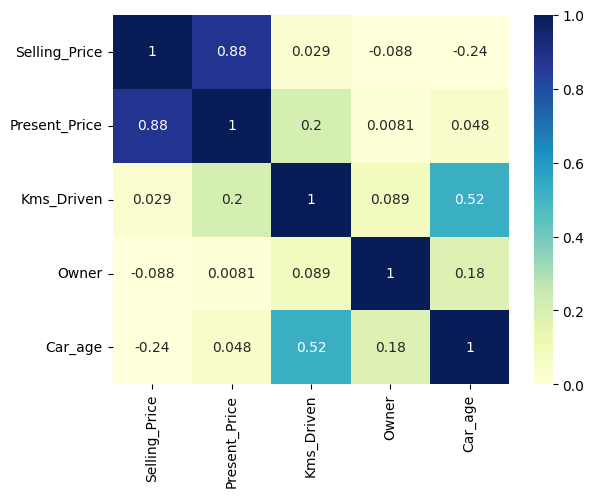

In [35]:
# find the pairwise correlation of all columns in the dataframe and presented by heatmap
sns.heatmap(cars.corr(), vmin=0, vmax=1, cmap="YlGnBu", annot=True)

# We can see the selling price and present price hava the highest correlation value -- 0.88.
# It means two variables have a strong relationship with each other

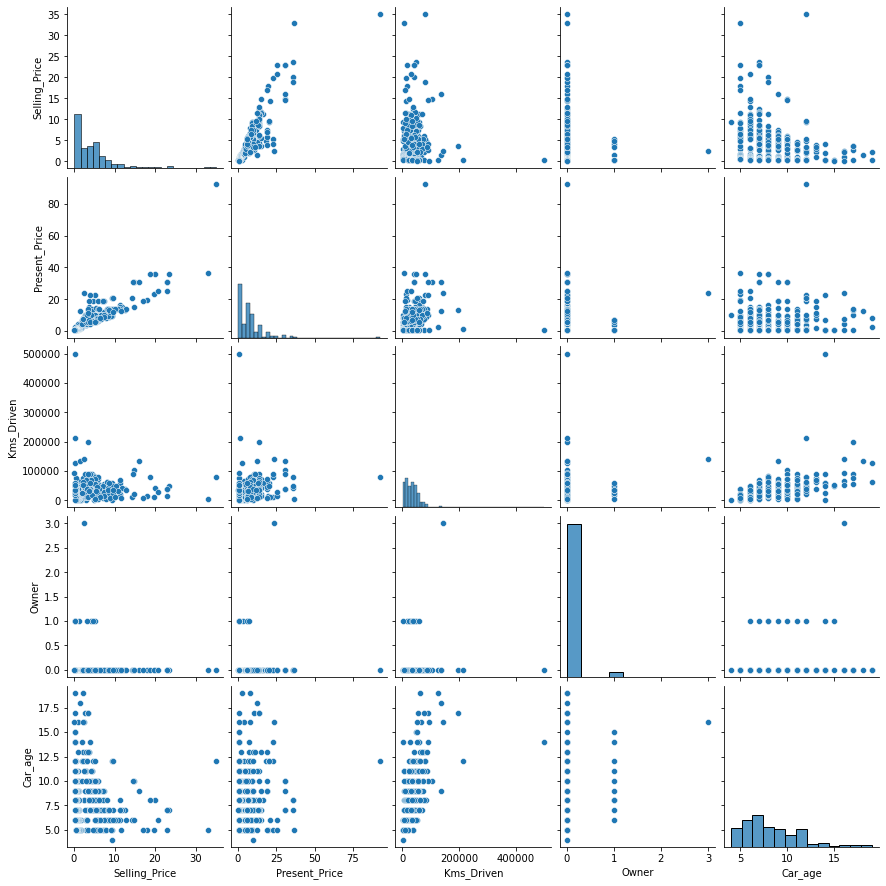

In [ ]:
sns.pairplot(cars)
#now we hava a better understanding of the overall date

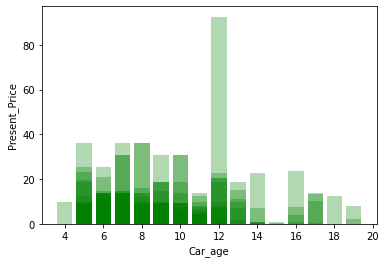

In [ ]:
plt.bar(cars.Car_age,cars.Present_Price, color='green',alpha=0.3)
plt.xlabel("Car_age")
plt.ylabel("Present_Price")
plt.show()

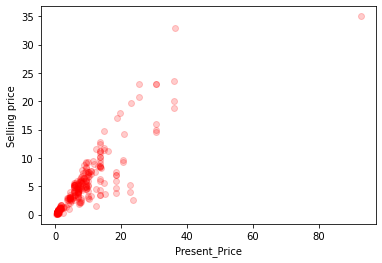

In [ ]:
plt.scatter(cars.Present_Price,cars.Selling_Price, color='red',alpha=0.2)
plt.xlabel("Present_Price")
plt.ylabel("Selling price")
plt.show()

In [ ]:
cars.pivot_table(values='Selling_Price', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


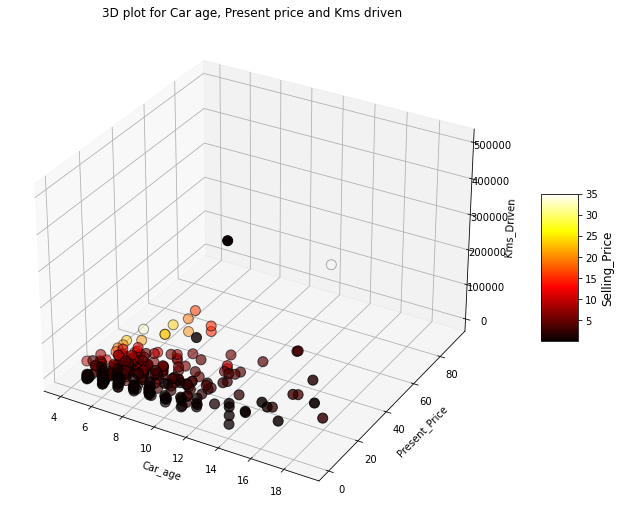

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(cars["Car_age"],
           cars["Present_Price"],
           cars["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=cars["Selling_Price"],s=100,cmap="hot")

ax.set_xlabel("Car_age")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=.3,aspect=4)
lab.set_label("Selling_Price",fontsize = 12)

plt.title("3D plot for Car age, Present price and Kms driven",color="black")
plt.show()


Conclusions:
Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
Car age is effecting negatively as older the car lesser the Selling Price.

# 3. Prepare Data

Dummy and split

In [ ]:
car = cars

In [ ]:
car.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
car.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
car.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
car[["Fuel_Type","Seller_Type","Transmission"]]=car[["Fuel_Type","Seller_Type","Transmission"]].astype(int)
car.head(5)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,0,0,0,0,8
1,sx4,4.75,9.54,43000,1,0,0,0,9
2,ciaz,7.25,9.85,6900,0,0,0,0,5
3,wagon r,2.85,4.15,5200,0,0,0,0,11
4,swift,4.60,6.87,42450,1,0,0,0,8


In [ ]:
y=car.Selling_Price
x=car.drop(["Selling_Price","Car_Name"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.3, random_state=1)
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (210, 7)
x test:  (91, 7)
y train:  (210,)
y test:  (91,)


# 4. Apply to Regession Model
In this section, we used Linear Regression to implement data

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [ ]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def models(model,x_train_,y_train_,x_test_,y_test_):
    model.fit(x_train_,y_train_)
    predicts=model.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(model,x_train_,y_train_,cv=5)

    # Appending results to Lists
    r_2.append(R_2)
    CV.append(cross_val.mean())

    # Printing results
    print(model)
    print("\nr_2 score :", R_2)
    print("\nCV scores:", cross_val)
    print("\nCV scores mean:", cross_val.mean())

    # Plot for prediction vs originals
    plt.figure(figsize=[16,7])
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",color="r")
    ax=prediction[0].plot(label = "predictions",color="g")
    plt.legend(loc='upper right')
    plt.title("originals VS predictions")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression()

r_2 score : 0.8466064262307118

CV scores: [0.91513983 0.8949148  0.82525457 0.82190804 0.72193337]

CV scores mean: 0.835830120801873


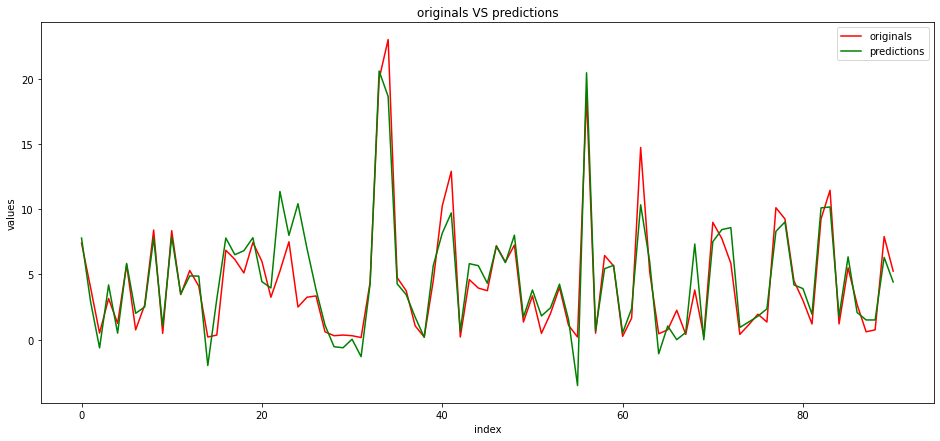

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
models(lr,x_train,y_train,x_test,y_test)

DecisionTreeRegressor()

r_2 score : 0.9474462622726929

CV scores: [0.82905078 0.87105829 0.90811801 0.90673507 0.4731159 ]

CV scores mean: 0.7976156092113967


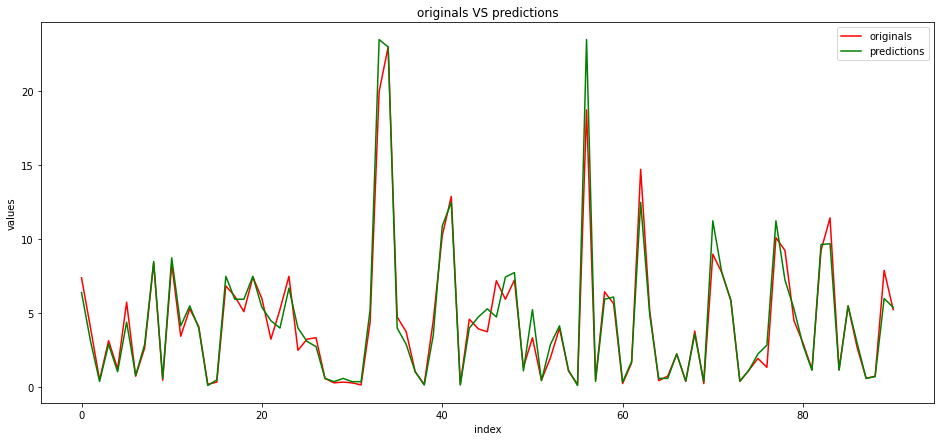

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
models(dtr,x_train,y_train,x_test,y_test)

RandomForestRegressor(random_state=42)

r_2 score : 0.8871735211528714

CV scores: [0.94153328 0.97022741 0.82608763 0.94484468 0.7348586 ]

CV scores mean: 0.8835103210057318


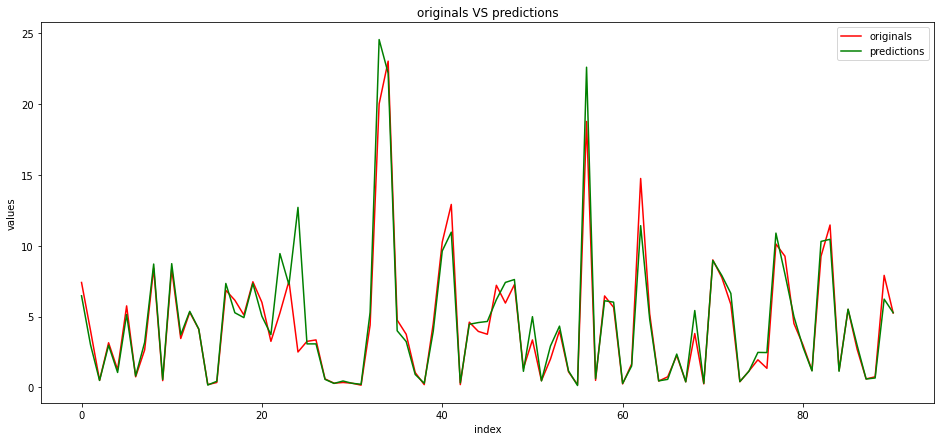

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
models(rf,x_train,y_train,x_test,y_test)

In [ ]:
Model = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor"]
results=pd.DataFrame({'Model': Model,'R-Squared': r_2,'CV score mean': CV})
results

,Model,R-Squared,CV score mean
0,LinearRegression,0.846606,0.835830
1,DecisionTreeRegressor,0.947446,0.797616
2,RandomForestRegressor,0.887174,0.883510


## Predict price

In [ ]:
import statsmodels.api as sm

x0 = car[['Owner','Car_age', 'Kms_Driven']]
y0 = car['Selling_Price']

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x0, y0)

DecisionTreeRegressor(random_state=0)

In [ ]:
# preidicte price
prediction_data = pd.DataFrame({ 'Owner': [2, 0, 1], 'Car_age': [3, 7, 5], 'Kms_Driven': [70000,125500, 35000]})
prediction_data = prediction_data[['Owner', 'Car_age', 'Kms_Driven']]
print(prediction_data)

   Owner  Car_age  Kms_Driven
0      2        3       70000
1      0        7      125500
2      1        5       35000


In [ ]:
y_pred = regressor.predict(prediction_data)
print(y_pred)

[11.25  4.9   7.75]


In [ ]:
predictions_df = pd.DataFrame({'Predict Price': y_pred})
predictions_joined = prediction_data.join(predictions_df)

In [ ]:
predictions_joined.rename(index = {0: 'Choice1', 1: 'Choice2', 2: 'Choice3'})

,Owner,Car_age,Kms_Driven,Predict Price
Choice1,2,3,70000,11.25
Choice2,0,7,125500,4.90
Choice3,1,5,35000,7.75
